In [3]:
!pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 366.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 152.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 459.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 991.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 615.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 1.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 590.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 523.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 534.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 700.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 383.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

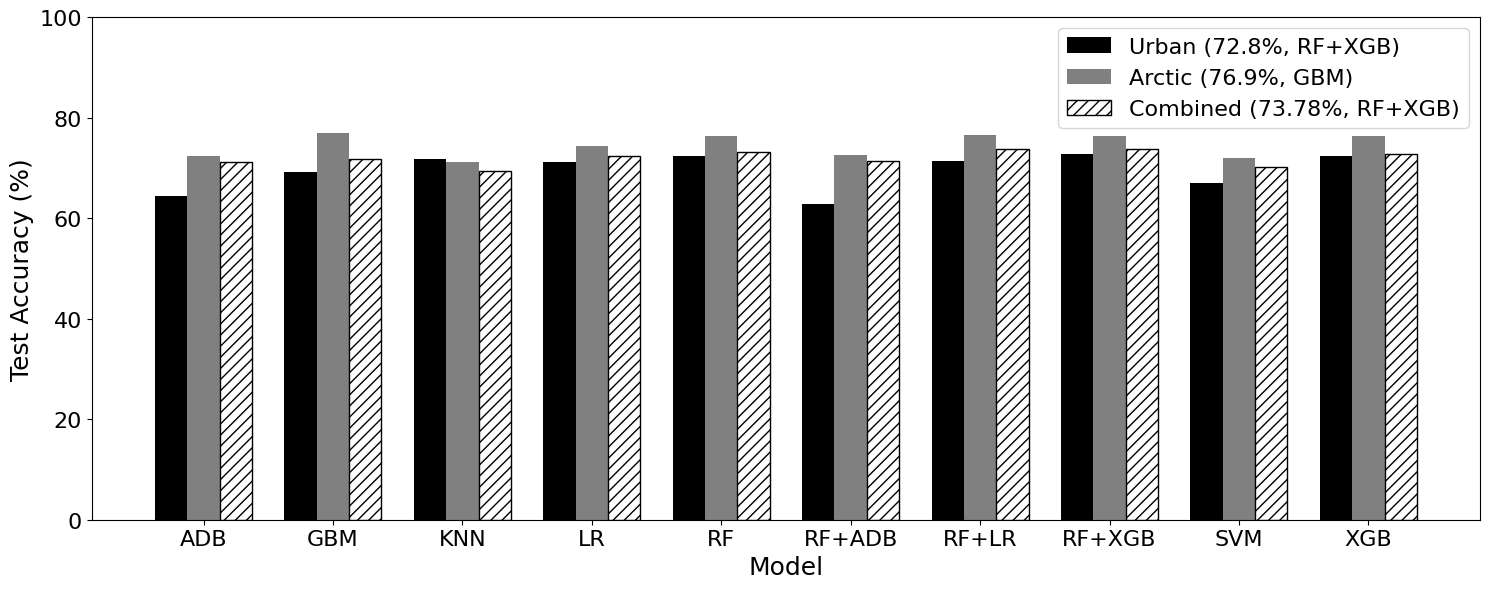

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("accuracy total.csv", index_col=0)
df = df * 100

df_p4 = df.loc[["Urban", "Arctic", "Combined"]]
df_p4_T = df_p4.T

urban_values = df_p4_T["Urban"]
arctic_values = df_p4_T["Arctic"]
combined_values = df_p4_T["Combined"]

fig, ax = plt.subplots(figsize=(15, 6))

x = np.arange(len(urban_values))
width = 0.25  # Width of the bars
bars_urban = ax.bar(x - width, urban_values, width, color="black", label="Urban (72.8%, RF+XGB)")
bars_arctic = ax.bar(x, arctic_values, width, color="gray", label="Arctic (76.9%, GBM)")
bars_combined = ax.bar(x + width, combined_values, width, color="white", edgecolor="black", hatch='///', label="Combined (73.78%, RF+XGB)")

ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(df_p4_T.index, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("Test Accuracy (%)", fontsize=18)
ax.set_xlabel("Model", fontsize=18)
ax.legend(fontsize=16)

plt.tight_layout()
plt.savefig("accuracy_total.png", dpi=300)
plt.show()

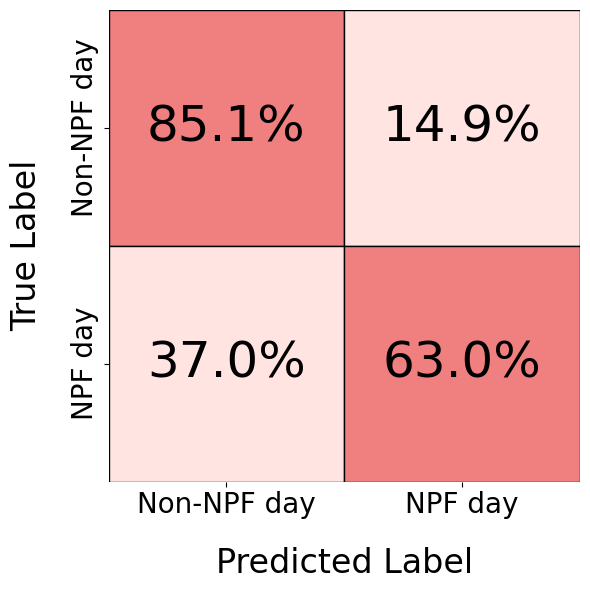

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_class_0 = 0.8510
accuracy_class_1 = 0.63
total_samples = 1000

tp_class_0 = int(accuracy_class_0 * total_samples)
fn_class_0 = total_samples - tp_class_0
tp_class_1 = int(accuracy_class_1 * total_samples)
fn_class_1 = total_samples - tp_class_1

cm = np.array([[tp_class_0, fn_class_0],
               [fn_class_1, tp_class_1]])

cm_row_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)
annot_row = np.char.add((cm_row_normalized * 100).round(1).astype(str), '%')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm_row_normalized * 100,
    annot=annot_row,
    fmt="",
    cmap="Reds",
    cbar=False,
    xticklabels=['Non-NPF day', 'NPF day'],
    yticklabels=['Non-NPF day', 'NPF day'],
    linecolor='black',
    linewidths=0.5,
    square=True
)

for i in range(2):
    for j in range(2):
        color = "lightcoral" if i == j else "mistyrose"
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color, ec='black', lw=1))

ax.set_xlabel("Predicted Label", fontsize=24, labelpad=20)
ax.set_ylabel("True Label", fontsize=24, labelpad=20)
ax.set_xticklabels(['Non-NPF day', 'NPF day'], fontsize=20)
ax.set_yticklabels(['Non-NPF day', 'NPF day'], fontsize=20)

for text in ax.texts:
    text.set_fontsize(36)
    text.set_color('black')

plt.tight_layout()
plt.savefig("arctic.png", dpi=300)
plt.show()